# Сборный проект №1

Вы работаете в интернет-магазине <b>«Стримчик»</b>, который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, <b>Xbox</b> или <b>PlayStation</b>). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.<br/><br/>
Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Не важно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.<br/><br/>
В наборе данных попадается аббревиатура <b>ESRB (Entertainment Software Rating Board)</b> — это ассоциация, определяющая возрастной рейтинг компьютерных игр. <b>ESRB</b> оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».|

# Описание данных

* <b>Name</b> — название игры
* <b>Platform</b> — платформа
* <b>Year_of_Release</b> — год выпуска
* <b>Genre</b> — жанр игры
* <b>NA_sales</b> — продажи в Северной Америке (миллионы долларов)
* <b>EU_sales</b> — продажи в Европе (миллионы долларов)
* <b>JP_sales</b> — продажи в Японии (миллионы долларов)
* <b>Other_sales</b> — продажи в других странах (миллионы долларов)
* <b>Critic_Score</b> — оценка критиков (максимум 100)
* <b>User_Score</b> — оценка пользователей (максимум 10)
* <b>Rating</b> — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

Данные за 2016 год могут быть неполными.

---

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from scipy import stats as st
from IPython.display import display # добавим возможность красивого принта

### Шаг 1. Откройте файл с данными и изучите общую информацию

In [2]:
df0 = pd.read_csv('/datasets/games.csv')

In [3]:
#######
df = df0.copy()

In [4]:
df.head(5)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


### Шаг 2. Подготовьте данные  
    • Замените названия столбцов (приведите к нижнему регистру);  
    • Преобразуйте данные в нужные типы. Опишите, в каких столбцах заменили тип данных и почему;  
    • Обработайте пропуски при необходимости:  
        ◦ Объясните, почему заполнили пропуски определённым образом или почему не стали это делать;  
        ◦ Опишите причины, которые могли привести к пропускам;  
        ◦ Обратите внимание на аббревиатуру 'tbd' в столбцах с рейтингом.   Отдельно разберите это значение и опишите, как его обработать;  
    • Посчитайте суммарные продажи во всех регионах и запишите их в отдельный столбец.

In [5]:
df.columns = df.columns.str.lower()

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [7]:
# также приведем к нижнему регистру и содержание некоторых колонок
def to_lower(col_name):
  df[col_name] = df[col_name].map(lambda x: x.lower(), na_action='ignore')

In [8]:
for i in ['name', 'platform', 'genre']:
  to_lower(i)

In [9]:
df.duplicated().sum() # посмотрим дубли

0

In [10]:
dupls = df[df.duplicated(subset=['name', 'platform'])]
dupls

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1591,need for speed: most wanted,x360,2005.0,racing,1.0,0.13,0.02,0.10,83.0,8.5,T
4127,sonic the hedgehog,ps3,NaN,platform,0.0,0.48,0.00,0.00,43.0,4.1,E10+
11715,need for speed: most wanted,pc,2012.0,racing,0.0,0.06,0.00,0.02,82.0,8.5,T
14244,NaN,gen,1993.0,NaN,0.0,0.00,0.03,0.00,NaN,NaN,NaN
16230,madden nfl 13,ps3,2012.0,sports,0.0,0.01,0.00,0.00,83.0,5.5,E


In [11]:
for index, row in dupls.iterrows():
    display(df.query("name==@row['name'] and platform==@row.platform"))

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1190,need for speed: most wanted,x360,2012.0,racing,0.62,0.78,0.01,0.15,83.0,8.5,T
1591,need for speed: most wanted,x360,2005.0,racing,1.00,0.13,0.02,0.10,83.0,8.5,T


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1745,sonic the hedgehog,ps3,2006.0,platform,0.41,0.06,0.04,0.66,43.0,4.1,E10+
4127,sonic the hedgehog,ps3,NaN,platform,0.00,0.48,0.00,0.00,43.0,4.1,E10+


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
5972,need for speed: most wanted,pc,2005.0,racing,0.02,0.23,0.0,0.04,82.0,8.5,T
11715,need for speed: most wanted,pc,2012.0,racing,0.00,0.06,0.0,0.02,82.0,8.5,T


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
604,madden nfl 13,ps3,2012.0,sports,2.11,0.22,0.0,0.23,83.0,5.5,E
16230,madden nfl 13,ps3,2012.0,sports,0.00,0.01,0.0,0.00,83.0,5.5,E


Дубликатов мало, влияние на общие данные минимальны. Из пяти дубликатов 4 под вопросом - разные года релиза, хотя при этом оценки идентичные. Если бы дубликатов было больше, стоило было изучить данный вопрос более подробно.
Удалю только явный последний дубль 

In [12]:
df.drop([16230], axis=0, inplace=True)

In [13]:
df.rating.unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

In [14]:
df['user_score'].value_counts()

tbd    2424
7.8     324
8       290
8.2     282
8.3     254
       ... 
1.5       2
0.7       2
0.5       2
9.7       1
0         1
Name: user_score, Length: 96, dtype: int64

Значительная часть данных с непонятным значением tbd. Поиск в гугле подсказал, что это To Be Determined - неопределенные значения. Для нас это NaN. Возможно такое значение связано со спецификой оценки. Заполнить какими то усредненными значениями пропуски будет неверным. Заменим на Nan.  

In [15]:
df['user_score'].replace('tbd', np.NaN, inplace=True)
df.user_score = df.user_score.astype(np.float64) # и теперь скорректируем тип данных так как был object
df.rating.isna().sum()

6766

Здесь указано https://www.esrb.org/history/ что K-A (Kids to Adults) rating category changed to E (Everyone).

Отсюда следует
https://rating-system.fandom.com/wiki/Entertainment_Software_Rating_Board 
RP (rating pending)	Games without a rating yet. Рейтинг ожидается. По сути для нас также Nan.  
Произведем соотв-щую замену.

In [16]:
df['rating'].replace('RP', np.NaN, inplace=True)
df['rating'].replace('K-A', 'E', inplace=True)

Пропусков почти половина. Заполнять их не будем, это приведет к искажению данных.

In [17]:
df.query("critic_score == 'tbd'")  # здесь неопределенностей нет

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


Пропусков в этом стоблце critic_score более половины, но заполнять также их будет ошибкой.

In [18]:
df['all_sales'] = df.loc[:, 'na_sales':'other_sales'].sum(axis=1)

### Шаг 3. Проведите исследовательский анализ данных

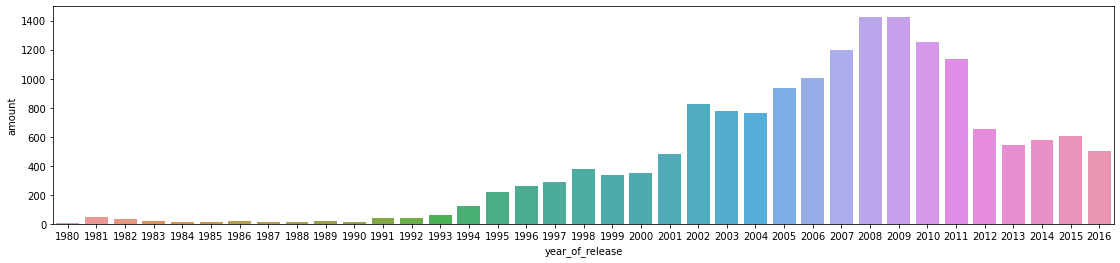

In [19]:
amount_per_year = df.pivot_table(index='year_of_release', aggfunc={'year_of_release':'count'}).\
                                rename({'year_of_release':'amount'}, axis=1).\
                                reset_index()

amount_per_year.year_of_release = amount_per_year.year_of_release.astype('int') # nan-ы ушли, можно поменять тип на int

plt.figure(figsize = (19,4))
sns.barplot(data=amount_per_year, y='amount', x='year_of_release')
plt.show()


Характер распределения: напоминает нормальное, ассиметрично, скошено влево. Явный рост игровой индустрии  начался в 1993 году. Характер роста близок к линейному. Пик выпуска игр пришелся на 2008-2009 года. Упал более чем в два раза к 2013 г. и далее мало изменялся.

In [20]:
df_ce = df.copy() #clear year
df_ce.dropna(subset = ['year_of_release'], inplace=True) # пропусков немного, заполнять их не стали, удалим пропуски

pl_per_year = df.pivot_table(index=['platform', 'year_of_release'], 
                             aggfunc={'all_sales':'sum'}).reset_index() #изменение продаж платформ по годами  - platfor per year


pl_per_year

,platform,year_of_release,all_sales
0,2600,1980.0,11.38
1,2600,1981.0,35.68
2,2600,1982.0,28.88
3,2600,1983.0,5.84
4,2600,1984.0,0.27
...,...,...,...
233,xb,2008.0,0.18
234,xone,2013.0,18.96
235,xone,2014.0,54.07
236,xone,2015.0,60.14


In [21]:
best_plat = pl_per_year.pivot_table(index=['platform'], 
                        aggfunc={'all_sales':'sum'}).\
                        sort_values(by='all_sales', ascending=False).\
                        reset_index().\
                        head(10) # глянем на максимальные продажи платформ
best_plat                     

,platform,all_sales
0,ps2,1233.56
1,x360,961.24
2,ps3,931.33
3,wii,891.18
4,ds,802.78
5,ps,727.58
6,ps4,314.14
7,gba,312.88
8,psp,289.53
9,3ds,257.81


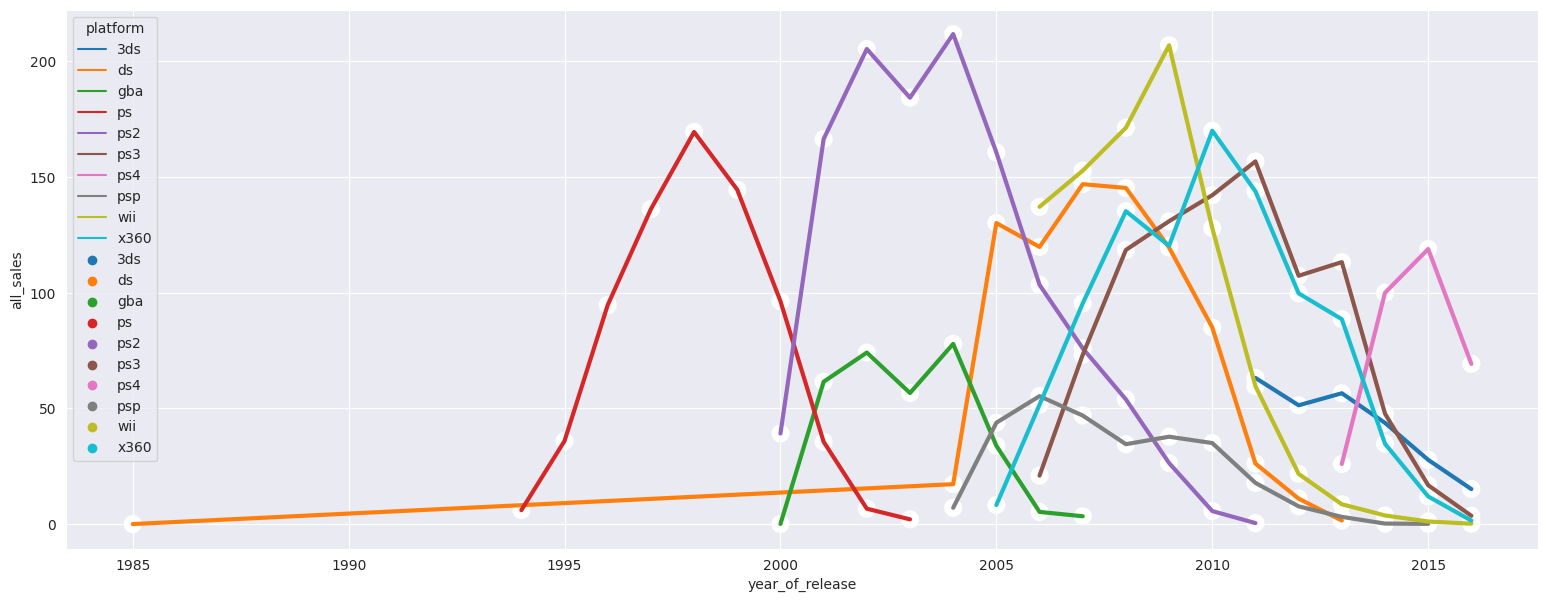

In [54]:
data = pl_per_year.query("platform in @best_plat.platform")

plt.figure(figsize = (19,7))
sns.scatterplot(data=data, hue='platform', 
             x='year_of_release', y='all_sales',
             linewidth=7) # а так увидим точки 
sns.lineplot(data=data, hue='platform', 
             x='year_of_release', y='all_sales',
             linewidth=3)
#plt.figure(figsize = (19,4))
plt.show()


Выводы: средний срок "жизни" платформы около 7-10 лет. Период появления новых платформ - около 5 лет. Так видно, что в 2000 году появились 2 удачных платформы, в 2004-2006. В 2011, 2013. Скорее всего, часть не успевших "взлететь" платформ не попала на график (надо уменьшить левую границу по годам.)

Чтобы учесть возможные набирающие популярность платформы, и в то же время не упустить устаревающие, с учетом обозначенных периодов, возьмем отступ от 2017 в 5 лет. Т.е. актуальным будем считать период с 2012 Так мы учтем пики популярных и не упустим устаревающие платформы. Но построим для проверки и графики с левым и правым отступом по годам.
    
На графике виден явный выброс по платформе DS  - имеются данные о продажах в 1985, что является ошибкой. Удалим эти данные.

In [23]:
df = df.drop(df.query("platform=='ds' and year_of_release<=1990").index, axis=0)

In [24]:
def draw_sales(l_year, df):
  pl_per_year = df.query('year_of_release>=@l_year')
  best_plat = (pl_per_year.pivot_table(index=['platform'], aggfunc={'all_sales':'sum'})
                          .sort_values(by='all_sales', ascending=False)
                          .reset_index()
                          .head(10)) 

  data = pl_per_year.query("platform in @best_plat.platform")
  plt.figure(figsize = (19,7))
  sns.lineplot(data=data, hue='platform', x='year_of_release', y='all_sales', linewidth=3)
  plt.xlabel(f'Продажи с {i} года')
  plt.show()

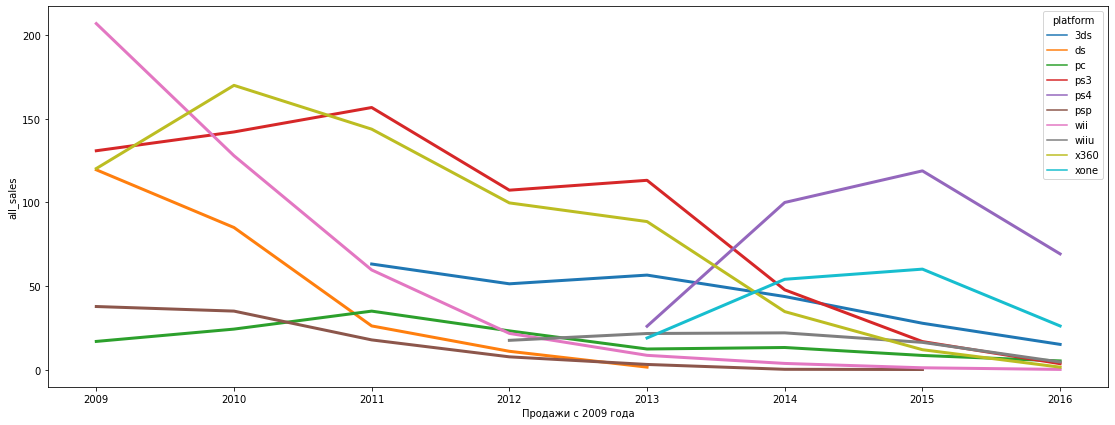

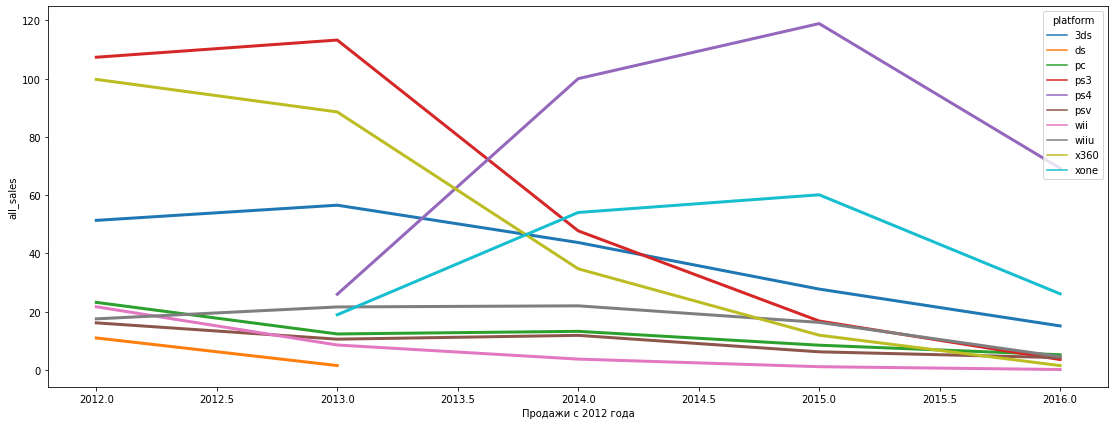

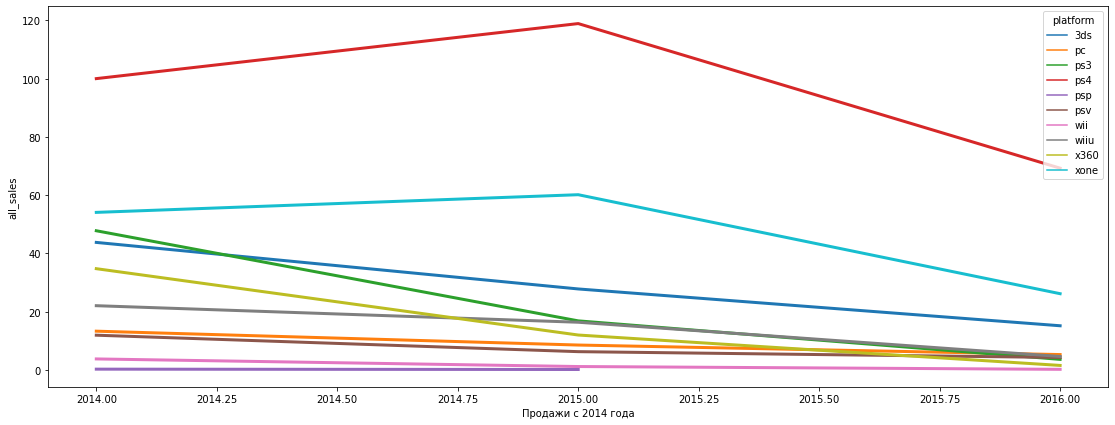

In [25]:
for i in [2009, 2012, 2014]:
  draw_sales(i, pl_per_year)  # поправил толщину линий

Характер результатов на трех графиках почти идентичен.  
Вывод: ничего утешительного в ироговой индустрии на границе 2016 года нет. Новые приставки появились в 2011, 2013 году, но большого успеха не получили. С учетом того, что данные в 2016 году могут быть неполными, возможно, такого падения продаж в 2016 г. у этих платформ нет, а может быть и есть рост, но к сожалению, насколько обрезаны данные за 2016 год не уточнено, в любом случае по динамики роста с 2013 г понятно, что большого роста ожидать не стоит.  
По моему мнению, предсказание продаж на 2017 осложенно именно тем фактором, что нет полноты за 2016 г и не уточнено какова эта неполнота. Если принять, что она небольшая, то видна явная отрицательная динамика продаж, новых платформ за ближайшее время не появилось, и можно сделать прогноз что продажи за 2017 год будут еще ниже чем в 2016 году.
Если считать, что за 2016 данные сильно не полные, то, возможно, показали бы рост продаж за счет "взлета" платформы "PS4", "Xone" и возможно "3DS" и общий уровень продаж увеличился в сравнении с 2016 г.
С учетом того, что на графике видно значительное падение продаж тех платформ, которые были успешными в 2012 и ранее, и рост продаж новых платформ в 2013, поменяем актуальный период на 2013 год.


In [26]:
df_act = df.query('year_of_release>=2013') # все таки я решил использовать в качестве начала актуального периода 2013г.

Продажи по платформам с 2013 г.


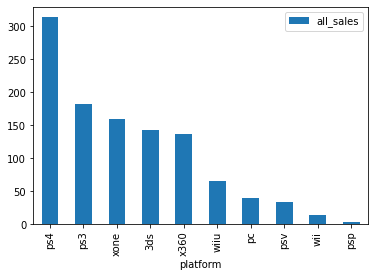

<Figure size 360x216 with 0 Axes>

In [27]:
best_plat_2013 = pl_per_year.query('year_of_release>=2013').\
                        pivot_table(index=['platform'], 
                        aggfunc={'all_sales':'sum'}).\
                        sort_values(by='all_sales', ascending=False).\
                        reset_index().\
                        head(10) # глянем на максимальные продажи платформ за актуальный период
print("Продажи по платформам с 2013 г.")
best_plat_2013.plot(x='platform', y='all_sales',kind='bar')
plt.figure(figsize = (5,3))
plt.show()



Видно, на втором месте по продажам находится PS3, но динамика продаж показывает низкую перспективность платформы. За актуальный период наибольшая выручка была в 2013 году, а далее она значительно упала. X360  побеждает 

Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам.

In [28]:
# Немного подправим имеющуюся функцию draw_sales.
def draw_box_sales(l_year, df, best_plat):
  pl_per_year = df.query('year_of_release>=@l_year')
  data = df.query('year_of_release>=@l_year').query("platform in @best_plat.platform")

  plt.figure(figsize = (12,5))
  ax = sns.boxplot(data=data, x='platform', y='all_sales',
                   hue='platform', hue_order= best_plat.platform,
                   )  # рисуем ящик

  ax.set(ylim=(0, 3))              
  plt.show()

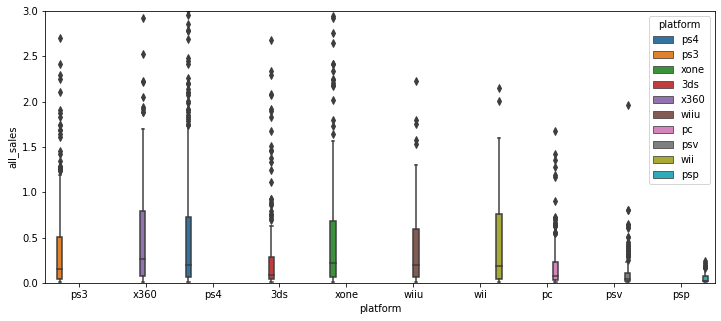

In [29]:
draw_box_sales(2013, df_ce, best_plat_2013) # берем общий датафрейм без пропусков дат релизов

Медиана по самым успешным платформам -  в районе 0.25 млн дол. за игру.
Аномальные верхние значения находятся в среднем выше значения 1.5. Видно, что нормальности распределений нет, распределение продаж скошены вправо. Кроме того имеем большое число выбросов у PS4 и 3DS, возможно это связано с тем, что на данной платформе выходили большое количество игр-хитов, которые пользовались повышенным спросом относительно обычных игр-середнячков.

Для изучения влияния рейтингов пользователей и критиков возьмем платформу топовую платформу PS4:


In [30]:
best_plat_2013.head() # вспомним наши топовые платформы.

,platform,all_sales
0,ps4,314.14
1,ps3,181.43
2,xone,159.32
3,3ds,143.25
4,x360,136.80


In [31]:
def show_corr(plat, df):  
  cols = ['critic_score', 'user_score', 'all_sales']
  data = df.query('platform==@plat' )[cols]
  plt.figure(figsize = (1,2))
  sns.heatmap(data.corr()[['all_sales']], annot=True, cmap="Greens")
  plt.show()
  plt.figure(figsize = (1,2))
  sns.pairplot(data[cols])
  plt.show()
  print('='*20)

In [32]:
matplotlib.rc_file_defaults()
sns.set_style("darkgrid")

Корреляция продаж с рейтингом критиков и пользователей PS4:


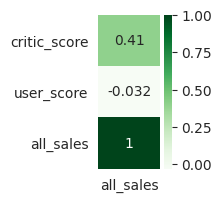

<Figure size 100x200 with 0 Axes>

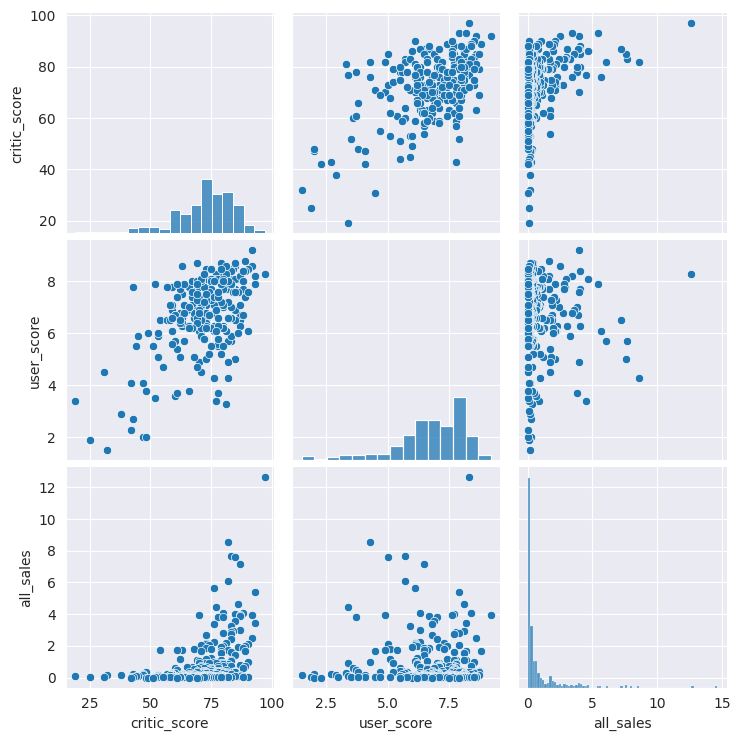

In [33]:
print('Корреляция продаж с рейтингом критиков и пользователей PS4:')
show_corr('ps4', df_ce)

Видна умеренная зависимость между оценками критиков и продажами. Зависимости от оценок пользователей нет. Видно, что низкие оценки есть как у пользователей так и у критиков, но доля низких оценок пользователей больше. С чем это связано сказать сложно, т.к. пользователи оставляют отзывы уже после покупки игры, вероятно, игры не оправдали их ожиданий. Плюс, вероятно, оценки критиков были завышены, не секрет, что они не редко промотивированы рекламными кампаниями.
Также на графике видно, что есть заметная корреляция между отзывами пользователей и критиков.

Построим аналогичную визуализацию и для PS3 и Xone

Корреляция продаж с рейтингом критиков и пользователей Xone:


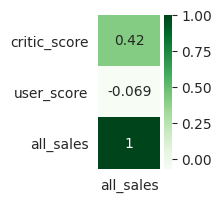

<Figure size 100x200 with 0 Axes>

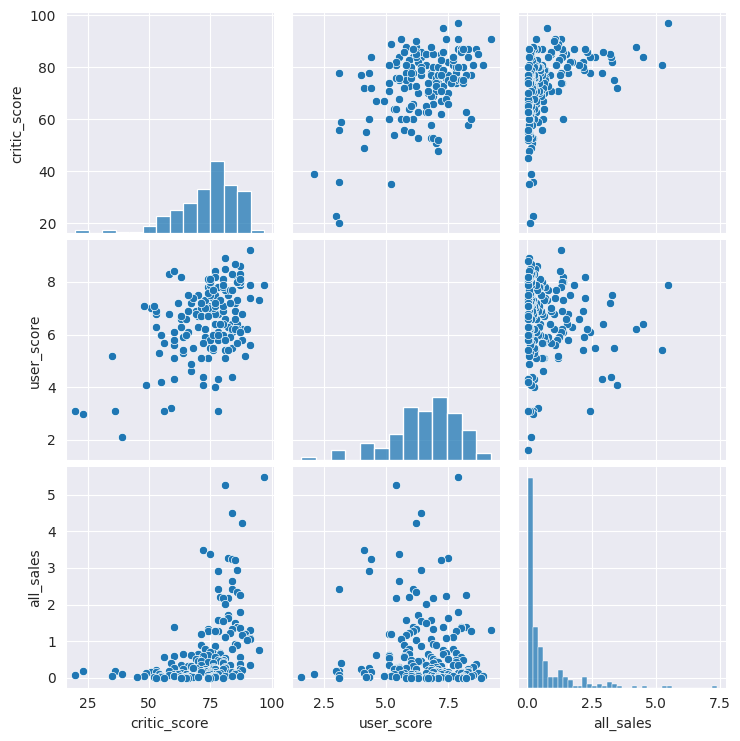

Корреляция продаж с рейтингом критиков и пользователей 3DS:


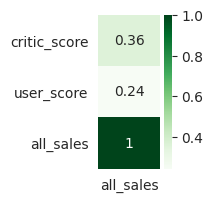

<Figure size 100x200 with 0 Axes>

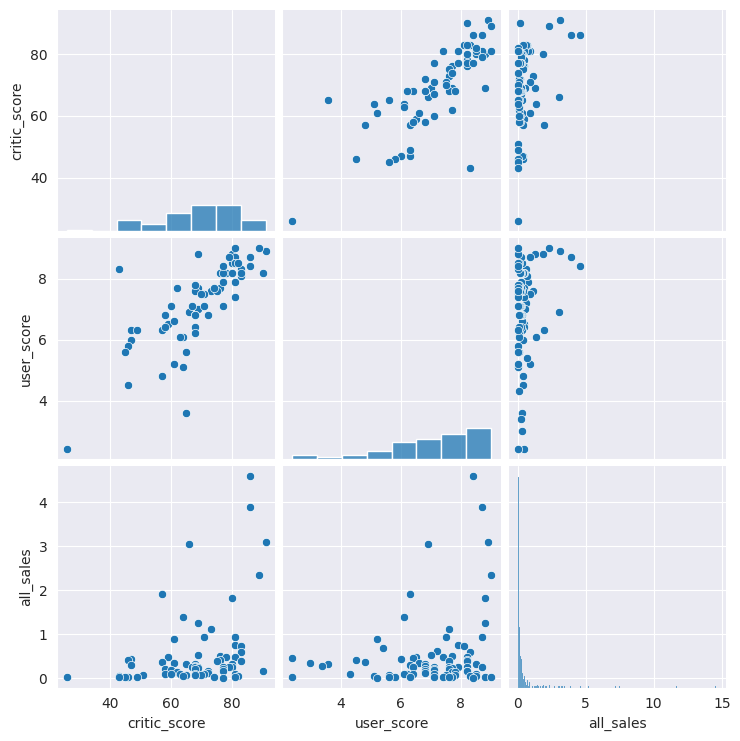

In [34]:
print('Корреляция продаж с рейтингом критиков и пользователей Xone:')
show_corr('xone', df_act)

print('Корреляция продаж с рейтингом критиков и пользователей 3DS:')
show_corr('3ds', df_act)

Выводы по  Xone и 3DS аналогичны : зависимость от отзывов критиков также умеренная, а вот у 3DS зависимость от рейтингов пользователей значительно выше, то есть насколько я понимаю, игры этой платформы в большей степени оправдывают ожидание геймеров.

Посмотрим на общее распределение игр по жанрам. 

,all_sales_median,all_sales_sum/1000,all_sales_count/1000
genre,,,
action,0.110,0.32187,0.766
shooter,0.450,0.23298,0.187
sports,0.240,0.15065,0.214
role-playing,0.125,0.14589,0.292
misc,0.100,0.06282,0.155
platform,0.225,0.04263,0.074
racing,0.120,0.03989,0.085
fighting,0.125,0.03531,0.080
adventure,0.030,0.02364,0.245


<Figure size 1000x500 with 0 Axes>

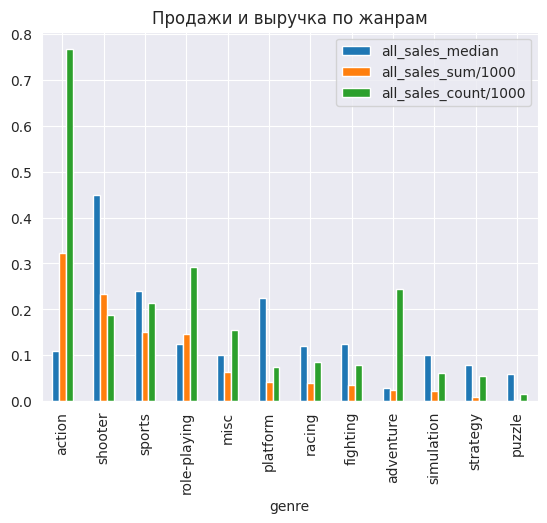

In [35]:
per_genre = df_act.groupby(by='genre').\
            agg({'all_sales': ['median', 'sum', 'count']}).\
            sort_values(by=('all_sales', 'sum'), ascending=False)

per_genre.columns = ['_'.join(col) for col in per_genre.columns]
per_genre.all_sales_sum = per_genre.all_sales_sum/1000 # уменьшим размерность
per_genre.rename({'all_sales_sum':'all_sales_sum/1000'}, axis=1, inplace=True)
per_genre.all_sales_count = per_genre.all_sales_count/1000 # уменьшим размерность
per_genre.rename({'all_sales_count':'all_sales_count/1000'}, axis=1, inplace=True)

display(per_genre)

plt.figure(figsize = (10,5))
per_genre.plot(kind='bar')
plt.title('Продажи и выручка по жанрам')
plt.show() #визуализируем данные

Распределение по жанрам неравномерное. Есть явные лидеры и аутсайдеры. Лидер по жанрам - Экшен, выручка составила более 300 млн длр., наименьшая популярность у игр жанра Пазл, разница на порядки. Больше всех релизов у жанра Экшен, но мединная выручка за игру значительно меньше жанров шутер и спорт. Лидер по медианной выручке - шутер.



### Шаг 4. Составьте портрет пользователя каждого региона

Будем использовать такую универсальную функцию на всех этапах шага:

In [36]:
def draw_reg_sales(group, df):
  
  regs = ['na_sales', 'eu_sales', 'jp_sales']
  regs_rus = dict(zip(regs, ['продажи в Северной Америке', 'продажи в Европе ', 'продажи в Японии']))
  fig, axs = plt.subplots(1,3, figsize=(10, 4))

  
  for num, reg in enumerate(regs):
    data = df.groupby(by=group).\
            agg({reg:['sum']}).\
            sort_values((reg, 'sum'), ascending=False).\
            head(5)
    data.columns = [reg]
    
    ax = data.plot(kind='bar', title=regs_rus[reg], ax=axs[num])

plt.show() # не получилось найти в документации как отобразить в одном масштабе.

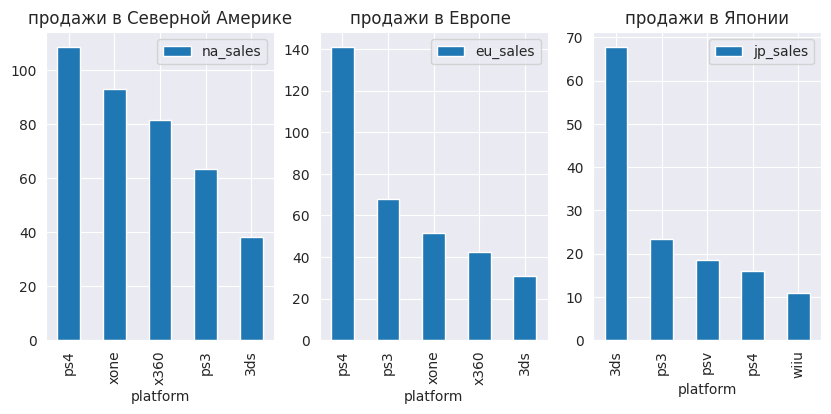

In [37]:
draw_reg_sales('platform', df_act)

В Северной  Америке и Европе набор пяти лидирующих платформ идентичен, за исключением распределения по лидерству, также в Европе доля продаж лидера - PS4 значительно большее.  
А вот продажи в Японии отличаются от этих регионов, лидер там - платформа 3DS, а также присутствуют PSV и WIIU. Японцы явно предпочитают "карманные" платформы и эта платформа там очень популярна, популярный ранее DS также подтверждает это. На продажу этой приставки приходится почти половина всех продаж из топ-5 платформ. 
Что стоить отметить отдельно - не смотря на то, что население Японии в разы меньше чем в первых двух регионах, отношение продаж к населению в разы выше, они явные игроманы! :)

Продажи по регионам в зависимости от жанра:


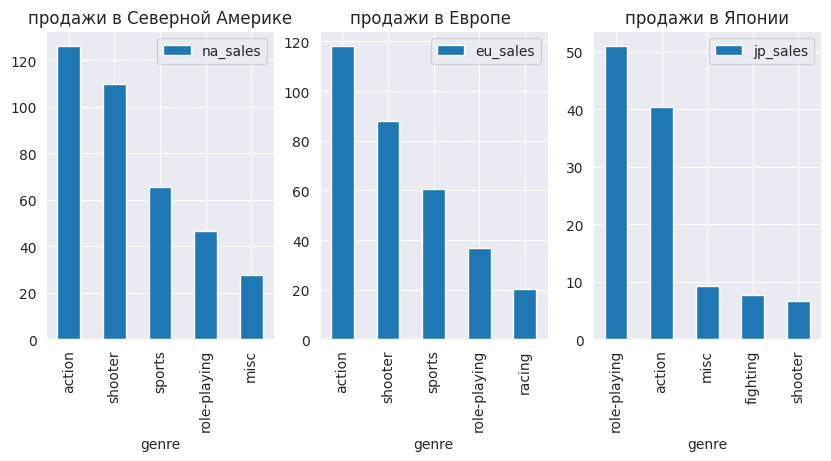

In [38]:
print('Продажи по регионам в зависимости от жанра:')
draw_reg_sales('genre', df_act)


Продажи в Европе и Сев. Америке по жанрам практически идентичны, за исключением пятого места - там есть отличия. Вкусы в Японии другие, вместо Экшена там на первом месте ролевые игры, Экшен занимает второе место. Также там больше отдают предпочтения симуляторам и файтингам.

In [39]:
data = df_act.copy()

Глянем на количество игр без рейтинга:

In [40]:
data.query("rating.isna()").shape[0]

977

Весомое значение. Заполним пропуски значением ND - not defined

In [41]:
data.fillna({'rating':'ND'}, inplace=True)

In [42]:
data.rating.replace({'E':'для всех', 'M':'>17 лет', 'T':'13-19 лет', 
                     'E10+':'>10 лет', 'ND':'не определен'}, inplace=True)

Продажи по регионам в зависимости от рейтинга:


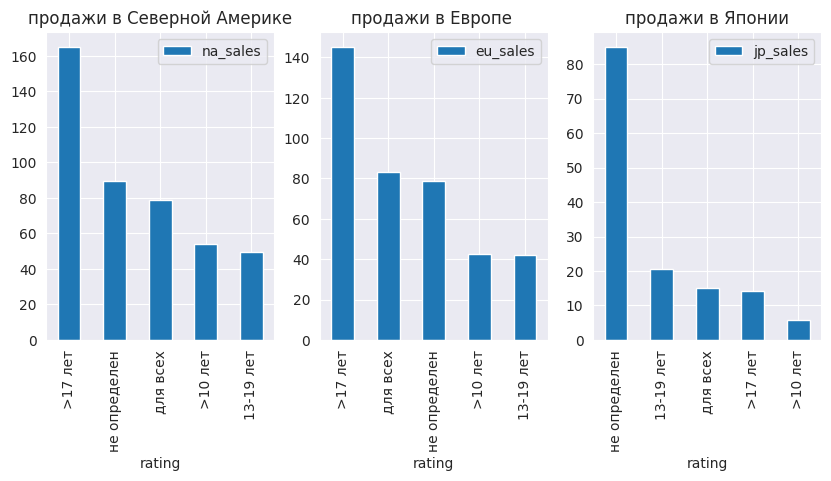

In [43]:
print('Продажи по регионам в зависимости от рейтинга:')
draw_reg_sales('rating', data)

И снова видим почти схожые результаты в Европе и Северной Америке и другую ситуацию в Японии. С учетом тех игр, рейтинг которых не определен можно сделать следующий вывод

В итоге получаем такой портрет пользователя при анализе продаж 2013-2016 гг:
- в регионах Северная Америка и Европа он будет схож: это пользователь любого возраста, но чаще старше 17 лет, покупающий игры жанров экшен, шутер и спорт для приставок PS4, PS3, X360, Xone.
- в Японии это покупатель игры  игры с неопределенным рейтингом,  либо в районе 13-19 лет, предпочитают ролевые игры или экшен, на игровых приставках 3DS, PS3, PSV.

Все таки Япония отличается менталитетом и образом жизни, а также своими местными платформами это естественным образом сказывается и на вкусах в играх.

### Шаг 5. Проверьте гипотез

#### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.  


Сформулируем гипотезы:  
Нулевая гипотеза H0 - рейтинги пользователей платформ Xbox One & PC равны  
Альтеранивная гипотеза H1 - рейтинги не равны

Уровень значимости alpha = 0.05

Для проверки гипотезы будем  также использовать t-test проверки равенства средних двух ГС по их выборкам.

Предварительно изучим данные:

In [44]:
df_act.platform.unique()


array(['ps3', 'x360', 'ps4', '3ds', 'xone', 'wiiu', 'wii', 'pc', 'psv',
       'ds', 'psp'], dtype=object)

182 155


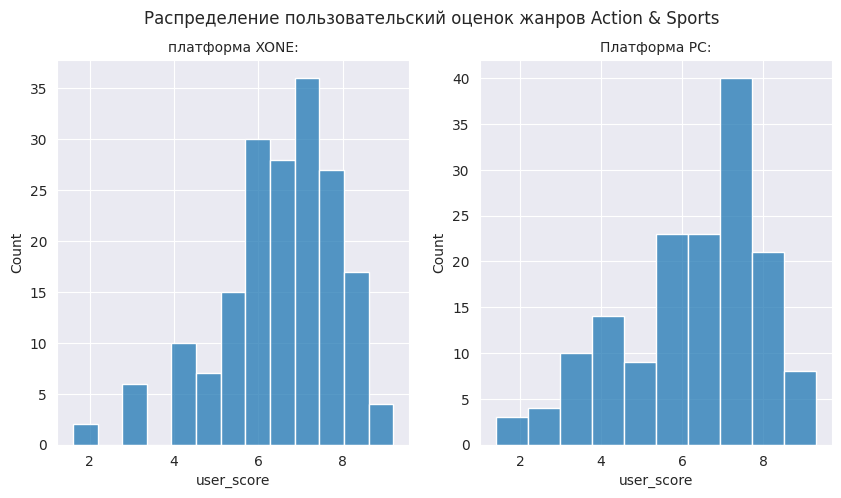

In [45]:
xone = df_act.query("platform=='xone' and user_score>0")
pc = df_act.query("platform=='pc' and user_score>0")
print(xone['user_score'].notna().sum(), pc['user_score'].notna().sum()) # посмотрим на размеры выборок

# посмотрим на распределения выборок. Но из пояснений ниже следует, что это не обязательно
fig, axs = plt.subplots(1,2, figsize=(10,5))
plt.suptitle('Распределение пользовательский оценок жанров Action & Sports')
sns.histplot(df_act.query("platform=='xone'")['user_score'], ax=axs[0]).\
            set_title('платформа XONE:', fontsize=10)
sns.histplot(df_act.query("platform=='pc'")['user_score'], ax=axs[1]).\
            set_title('Платформа PC:', fontsize=10)
plt.show()

В рамках изученного материала будем применять t-тест. Размеры выборок (более 30) позволяют это сделать.


In [46]:
xone['user_score'].var()

1.9069968429360695

In [47]:
pc['user_score'].var()

3.035892752408882

Следовательно, дисперсии нельзя считать равными (хотя ответ не сильно будет отличаться и здесь и во второй гипотезе).

In [48]:
ttest = st.ttest_ind(xone['user_score'], pc['user_score'], equal_var=False)[1]
print(ttest)

0.14759594013430463


Полученный результат выше alpha = 0.05, можно сделать вывод, что мы не можем отвергнуть нулевую гипотезу.  
Вывод: отвергнуть нулевую гипотизу не получилось. Значит, средний пользовательский рейтинг платформ Xbox One & PC равны.

Проверим следующую гипотезу.  

#### Средние пользовательские рейтинги жанров Action и Sports разные.  
Сформулируем гипотезы:  
H0 - средний пользовательский рейтинг жанра Action равен рейтингу Sports  
H1 - средние пользовательские рейтинги этих жанров не равны.

Уровень значимости alpha = 0.05

Для проверки гипотезы будем  также использовать t-test проверки равенства средних двух ГС по их выборкам.

In [49]:
action = df_act.query("genre=='action'  and user_score>0")
sports = df_act.query("genre=='sports'  and user_score>0")

In [50]:
print(action.shape[0])
print(sports.shape[0])

389
160


Размеры выборок достаточны для применения t-теста

In [51]:
ttest = st.ttest_ind(action['user_score'], sports['user_score'])[1]
print(ttest)

1.0517832389140023e-27


Получили очень маленькое значение уровня значимости. Следовательно, отклоняем нулевую гипотезу. 
Вывод: можно согласиться с исходным предположением, что средние пользовательские рейтинги жанров Action и Sports разные.

<b> Общий вывод:  
Явный рост игровой индустрии начался в 1993 году. Характер роста близок к линейному. Пик выпуска игр пришелся на 2008-2009 года. Кризис игровой индустрии начался в 2012 году. Продажи упали более чем в два раза к 2013 г. и далее динамика продаж мало изменялась.  
Средний срок "жизни" платформы около 7-10 лет. Период появления новых платформ - примерно 5 лет.
После 2013 года продажи по существующим платформам сильно упали, за исключением платформ PS4, XONE, 3DS - эти платформы в порядке убывания наиболее перспективны в 2017 году.  
Самый популярый жанр в целом - Экшен. По сумме выручки он в разы превосходит остальные жанры. Но в среднем, самый прибыльный жанр - шутер и спорт, а экшен даже не входит в топ-5. Далее, популярные жанры - шутеры, спортивные и ролевые.
Именно на эти платформы и жанры стоит обратить внимание магазину игр в 2017 году.  
На продажи умеренное влияние оказывает рейтинг критиков, пользовательский рейтинг на продажи, что ни странно, не влияет.  
В тоже время стоит отметить, что предпочтения в жанрах и платформах в разных регионах разнятся. Портреты пользователей в регионах выглядят так:
- в регионах Северная Америка и Европа он будет схож: это пользователь любого возраста, но чаще старше 17 лет, покупающий игры жанров экшен, шутер и спорт для приставок PS4, PS3, X360, Xone.
- в Японии это покупатель игры  игры с неопределенным рейтингом,  либо в районе 13-19 лет, предпочитают ролевые игры или экшен, на игровых приставках 3DS, PS3, PSV.    
Специфический менталитет, местные платформы и приверженность Nintendo формирует специфический портерт геймера: это чаще покупатель игры с неопределенным рейтингом,  либо в районе 13-19 лет, предпочитает ролевые игры или экшен, на игровых приставках  3DS, PS3, PSV. Также вспомним, что  доля продаж в перерасчете на человека там значительно выше, чем в остальных регинах, они явные "игроманы". Также японцы более других любят "карманные" платформы.

    
В завершении проверили две гипотезы с помощью t-testa, результаты которых:
- средний пользовательский рейтинг жанра Action равен рейтингу Sports
- средние пользовательские рейтинги этих жанров не равны.


